# L5: Extracting Tables

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>


In [1]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [2]:
from unstructured_client import UnstructuredClient
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

from unstructured.staging.base import dict_to_elements

In [3]:
from Utils import Utils
utils = Utils()

DLAI_API_KEY = utils.get_dlai_api_key()
DLAI_API_URL = utils.get_dlai_url()

s = UnstructuredClient(
    api_key_auth=DLAI_API_KEY,
    server_url=DLAI_API_URL,
)

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access Utils File and Helper Functions:</b> To access helper functions and other related files for this notebook, 1) click on the <em>"View"</em> option on the top menu of the notebook and then 2) click on <em>"File Browser"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>


## Example Document: Embedded Images and Tables

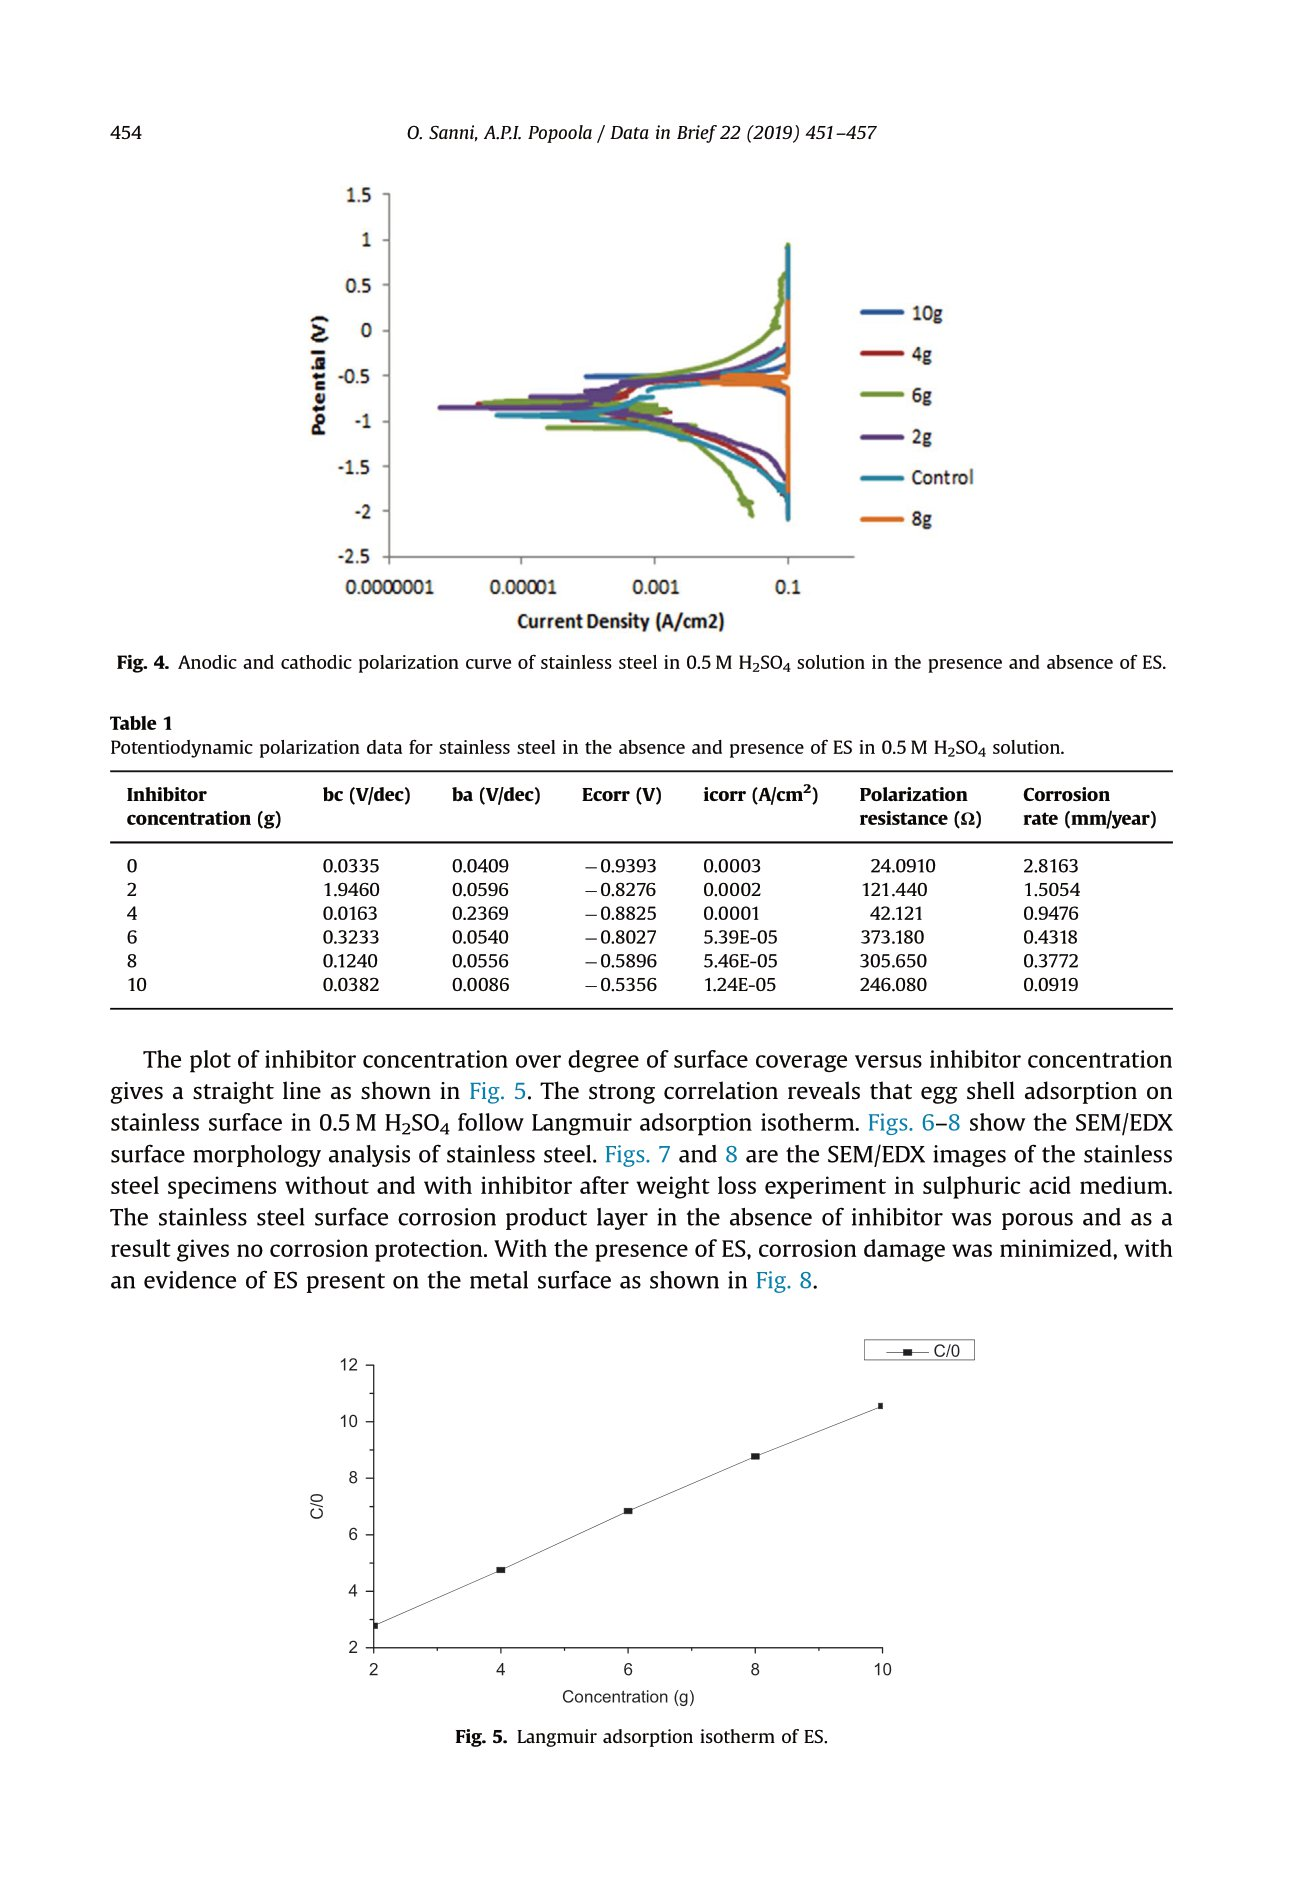

In [4]:
from IPython.display import Image
Image(filename="images/embedded-images-tables.jpg", height=600, width=600) 

## Process the Document and Extract Tables

In [5]:
filename = "example_files/embedded-images-tables.pdf"

with open(filename, "rb") as f:
    files=shared.Files(
        content=f.read(),
        file_name=filename,
    )

req = shared.PartitionParameters(
    files=files,
    strategy="hi_res",
    hi_res_model_name="yolox",
    skip_infer_table_types=[],
    pdf_infer_table_structure=True,
)

try:
    resp = s.general.partition(req)
    elements = dict_to_elements(resp.elements)
except SDKError as e:
    print(e)

In [6]:
tables = [el for el in elements if el.category == "Table"]

In [7]:
tables[0].text

'Inhibitor Polarization Corrosion be (V/dec) ba (V/dec) Ecorr (V) icorr (AJcm?) concentration (g) resistance (Q) rate (mmj/year) 0.0335 0.0409 —0.9393 0.0003 24.0910 2.8163 1.9460 0.0596 .8276 0.0002 121.440 1.5054 0.0163 0.2369 .8825 0.0001 42121 0.9476 s NO 03233 0.0540 —0.8027 5.39E-05 373.180 0.4318 0.1240 0.0556 .5896 5.46E-05 305.650 0.3772 = 5 0.0382 0.0086 .5356 1.24E-05 246.080 0.0919'

In [8]:
table_html = tables[0].metadata.text_as_html

In [9]:
from io import StringIO 
from lxml import etree

parser = etree.XMLParser(remove_blank_text=True)
file_obj = StringIO(table_html)
tree = etree.parse(file_obj, parser)
print(etree.tostring(tree, pretty_print=True).decode())

<table>
  <thead>
    <tr>
      <th>Inhibitor concentration (g)</th>
      <th>be (V/dec)</th>
      <th>ba (V/dec)</th>
      <th>Ecorr (V)</th>
      <th>icorr (AJcm?)</th>
      <th>Polarization resistance (Q)</th>
      <th>Corrosion rate (mmj/year)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td/>
      <td>0.0335</td>
      <td>0.0409</td>
      <td>&#8212;0.9393</td>
      <td>0.0003</td>
      <td>24.0910</td>
      <td>2.8163</td>
    </tr>
    <tr>
      <td>NO</td>
      <td>1.9460</td>
      <td>0.0596</td>
      <td>&#8212;0.8276</td>
      <td>0.0002</td>
      <td>121.440</td>
      <td>1.5054</td>
    </tr>
    <tr>
      <td/>
      <td>0.0163</td>
      <td>0.2369</td>
      <td>&#8212;0.8825</td>
      <td>0.0001</td>
      <td>42121</td>
      <td>0.9476</td>
    </tr>
    <tr>
      <td>s</td>
      <td>03233</td>
      <td>0.0540</td>
      <td>&#8212;0.8027</td>
      <td>5.39E-05</td>
      <td>373.180</td>
      <td>0.4318</td>
    </tr>
    <tr>
      

In [10]:
from IPython.core.display import HTML
HTML(table_html)

In [11]:
from langchain_openai import ChatOpenAI
from langchain_core.documents import Document
from langchain.chains.summarize import load_summarize_chain

In [12]:
llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo-1106")
chain = load_summarize_chain(llm, chain_type="stuff")
chain.invoke([Document(page_content=table_html)])

{'input_documents': [Document(page_content='<table><thead><tr><th>Inhibitor concentration (g)</th><th>be (V/dec)</th><th>ba (V/dec)</th><th>Ecorr (V)</th><th>icorr (AJcm?)</th><th>Polarization resistance (Q)</th><th>Corrosion rate (mmj/year)</th></tr></thead><tbody><tr><td></td><td>0.0335</td><td>0.0409</td><td>—0.9393</td><td>0.0003</td><td>24.0910</td><td>2.8163</td></tr><tr><td>NO</td><td>1.9460</td><td>0.0596</td><td>—0.8276</td><td>0.0002</td><td>121.440</td><td>1.5054</td></tr><tr><td></td><td>0.0163</td><td>0.2369</td><td>—0.8825</td><td>0.0001</td><td>42121</td><td>0.9476</td></tr><tr><td>s</td><td>03233</td><td>0.0540</td><td>—0.8027</td><td>5.39E-05</td><td>373.180</td><td>0.4318</td></tr><tr><td></td><td>0.1240</td><td>0.0556</td><td>—0.5896</td><td>5.46E-05</td><td>305.650</td><td>0.3772</td></tr><tr><td>= 5</td><td>0.0382</td><td>0.0086</td><td>—0.5356</td><td>1.24E-05</td><td>246.080</td><td>0.0919</td></tr></tbody></table>')],
 'output_text': 'The table provides data on 

## Work With Your Own Files

In [13]:
import panel as pn
#import param
from Utils import upld_file
pn.extension()

upld_widget = upld_file()
pn.Row(upld_widget.widget_file_upload)

Row
    [0] FileInput(accept='.pdf,.ppt,.png,....)

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 🖥 &nbsp; <b>Note:</b> If the file upload interface isn't functioning properly, the issue may be related to your browser version. In such a case, please ensure your browser is updated to the latest version, or try using a different browser.</p>


In [21]:
!ls ./example_files

"Edward Wabundani's Candidates.pdf"   embedded-images-tables.pdf
'Kilba-English Dictionary.pdf'


<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Uploading Your Own File - Method 2:</b> To upload your own files, you can also 1) click on the <em>"View"</em> option on the top menu of the notebook and then 2) click on <em>"File Browser"</em>. Then 3) click on <em>"Upload"</em> button to upload your files. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>

In [27]:
filename = "example_files/Edward Wabundani's Candidates.pdf"

with open(filename, "rb") as f:
    files=shared.Files(
        content=f.read(),
        file_name=filename,
    )

req = shared.PartitionParameters(
    files=files,
    strategy="hi_res", # or use chipper to change from visual transformer to table transformer outputs
    hi_res_model_name="yolox",
    skip_infer_table_types=[],
    pdf_infer_table_structure=True,
)

try:
    resp = s.general.partition(req)
    elements = dict_to_elements(resp.elements)
except SDKError as e:
    print(e)

In [24]:
tables = [el for el in elements if el.category == "Table"]

In [31]:
tables[2].text

'Marital Status Single Single Single Single Married Married'